
**AirQualityUCI**

Project Title :AirQualityUCI Project

**Objective:**
The objective of the AirQualityUCI Project is to develop a machine learning model capable of accurately predicting air quality by analyzing and interpreting a variety of pollutant metrics and environmental factors collected from an urban area. This model can help in forecasting pollution levels and advising on air quality management measures.

**Introduction**

Air pollution is a critical environmental issue impacting public health and the ecosystem. Monitoring and predicting air quality enables us to take preventive steps to reduce exposure to harmful pollutants. This project utilizes the Air Quality Data Set (AirQualityUCI), provided by UCI Machine Learning Repository, which contains measurements from various air pollutants, weather parameters, and other factors recorded dayly.

**Data** **Summary**:

The AirQualityUCI dataset includes hourly averaged responses from a variety of chemical sensors embedded in an air quality monitoring device. Here are some of the primary attributes:

Date and Time: Timestamps for each reading.
Pollutants: Levels of key pollutants like CO, NOx, NO2, and O3.

**Project Steps**

**1. Data Collection and Preprocessing**

•	Loading the Dataset: Load the dataset into a pandas DataFrame.

•	Data Cleaning: Check for missing values, outliers, and errors in the dataset. Handle missing values using techniques like interpolation or removal.

•	Feature Engineering: Create new features that may help improve model performance, such as aggregating readings by hour, day, or week.

**2. Exploratory Data Analysis (EDA)**

•	*Statistical Summary:*
Provide a summary of the dataset, including mean, median, standard deviation, and correlations between features.

*•	Visualization:*

o	Histograms: To visualize the distribution of pollutant levels.

o	Time Series Plots: To observe trends over time for specific pollutants.

o	Heatmaps: To analyze correlations between different features.



**3. Model Selection**

Select appropriate machine learning algorithms for regression or classification tasks, depending on the objective. Common models include:

•	Linear Regression: For predicting continuous variables like CO levels.

•	Decision Trees: For their interpretability and ability to capture non-linear relationships.

•	Random Forests: For robustness and handling overfitting.

•	Support Vector Machines (SVM): For classification tasks with clear margins.

**4. Model Training and Hyperparameter Tuning**

•	Data Splitting: Divide the dataset into training and testing sets.

•	Training: Train the selected models using the training set.

•	Hyperparameter Tuning: Use techniques like Grid Search or Random Search to find the best parameters for each model.


**5.Model Saving:**

o	The best-performing models are saved using joblib for future use.
  and make predictions on unseen data with this model.



⏰**AirQualityUCI** Data Preprocessing Steps


**Step 1: Load the Dataset:-**
Use pandas to import the data.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/city_day.csv')


**Step 2: Understand the Data Structure:-**
Use df.head(), df.info(), and df.describe() to inspect the dataset.

In [ ]:
# Inspect the first few rows
print(df.head())

# Get an overview of the dataset
print(df.info())

# Summary statistics for numerical columns
print(df.describe())


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

**Step3: Identify missing values**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
# Assuming `data` is your DataFrame containing the AirQualityUCI data
# data = pd.read_csv('path_to_your_data.csv')

# Step 1: Check for Missing Values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Step 2: Decide on an Imputation Strategy
# Define imputers based on the type of data

# For numerical columns, we use median imputation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
df[numerical_columns] = imputer_num.fit_transform(df[numerical_columns])

# Step 3: Handle Time-Series Data with Interpolation (for continuity in time-series)
# Interpolate numerical features based on time-series data
df[numerical_columns] = df[numerical_columns].interpolate(method='linear', limit_direction='both')

# Step 4: Drop columns or rows with excessive missing values (if any)
# For example, drop columns with more than 50% missing values
threshold = 0.5
data = df.loc[:, df.isnull().mean() < threshold]

# Confirm that missing values are handled
print("Remaining missing values per column after handling:\n", data.isnull().sum())


Missing values per column:
 City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64
Remaining missing values per column after handling:
 City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64


In [ ]:
print(df.head())

        City        Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0  Ahmedabad  2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1  Ahmedabad  2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2  Ahmedabad  2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3  Ahmedabad  2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4  Ahmedabad  2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  22.10   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  27.64  133.36     0.00     0.02    0.00  118.0        NaN  
1  24.55   34.06     3.68     5.50    3.77  118.0        NaN  
2  29.07   30.70     6.80    16.40    2.25  118.0        NaN  
3  18.59   36.08     4.43    10.14    1.00  118.0        NaN  
4  39.33   39.31     7.01    18.89    2.78  118.0        NaN  


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


**Step 4: Data Transformation:-**
Encode categorical variables and scale numerical features.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Encode categorical variables
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])
df['AQI_Bucket'] = label_encoder.fit_transform(df['AQI_Bucket'].astype(str))

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
print(df.head())

   City       Date    PM2.5      PM10        NO       NO2       NOx      NH3  \
0     0 2015-01-01 -0.26654 -0.193291 -0.731090 -0.412430 -0.472010 -0.23605   
1     0 2015-01-02 -0.26654 -0.193291 -0.728765 -0.522191 -0.495418 -0.23605   
2     0 2015-01-03 -0.26654 -0.193291  0.035219 -0.365576 -0.046258 -0.23605   
3     0 2015-01-04 -0.26654 -0.193291 -0.694820 -0.401151 -0.444192 -0.23605   
4     0 2015-01-05 -0.26654 -0.193291  0.253765 -0.273602  0.227173 -0.23605   

         CO       SO2        O3   Benzene   Toluene    Xylene       AQI  \
0 -0.183488  0.812044  4.918625 -0.200657 -0.413394 -0.440284 -0.313054   
1 -0.176052  0.630337  0.003261  0.057542 -0.095242  0.487837 -0.313054   
2  2.267235  0.896135 -0.163059  0.276450  0.537580  0.113635 -0.313054   
3 -0.067495  0.279859  0.103251  0.110164  0.174143 -0.194098 -0.313054   
4  2.966167  1.499475  0.263137  0.291184  0.682142  0.244113 -0.313054   

   AQI_Bucket  
0           6  
1           6  
2           6  
3   

⏰**AirQualityUCI** Data Visualization Steps

**Step 5: Univariate Analysis:-**
Use histograms and box plots to visualize individual features.


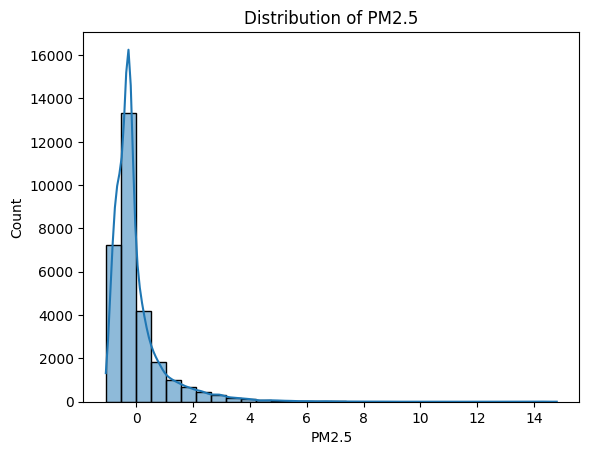

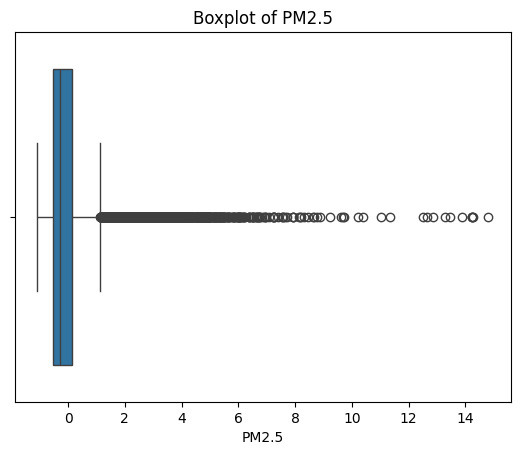

In [ ]:
# Histogram for PM2.5
sns.histplot(df['PM2.5'].dropna(), bins=30, kde=True)
plt.title('Distribution of PM2.5')
plt.show()

# Box plot for PM2.5
sns.boxplot(x=df['PM2.5'].dropna())
plt.title('Boxplot of PM2.5')
plt.show()


**Step 6: Bivariate Analysis:-**
Scatter plots and bar plots to visualize the relationship between two variables.

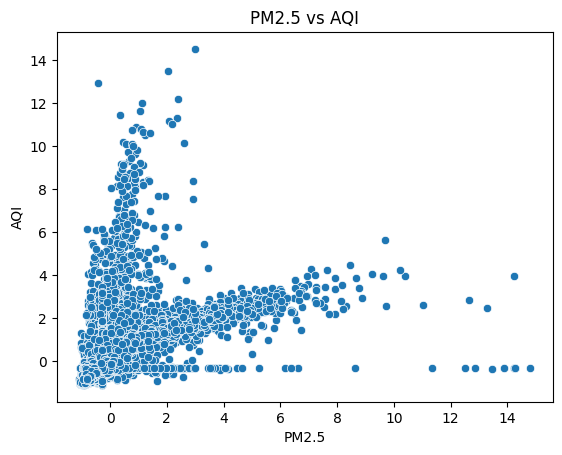

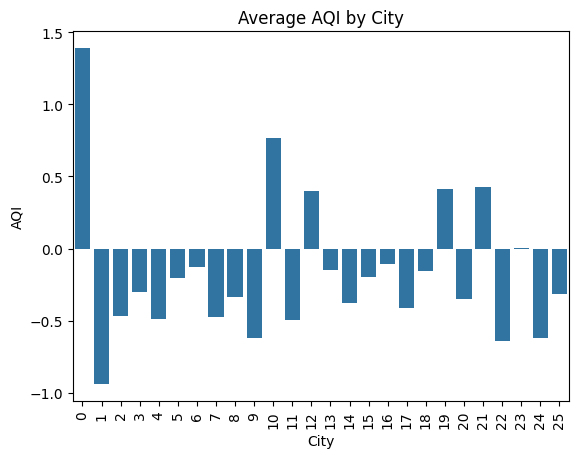

In [ ]:
# Scatter plot between PM2.5 and AQI
sns.scatterplot(x='PM2.5', y='AQI', data=df)
plt.title('PM2.5 vs AQI')
plt.show()

# Bar plot for average AQI by City
city_aqi = df.groupby('City')['AQI'].mean().reset_index()
sns.barplot(x='City', y='AQI', data=city_aqi)
plt.xticks(rotation=90)
plt.title('Average AQI by City')
plt.show()


**Step 7: Multivariate Analysis:-**
Pair plots and heatmaps to explore relationships between multiple features.

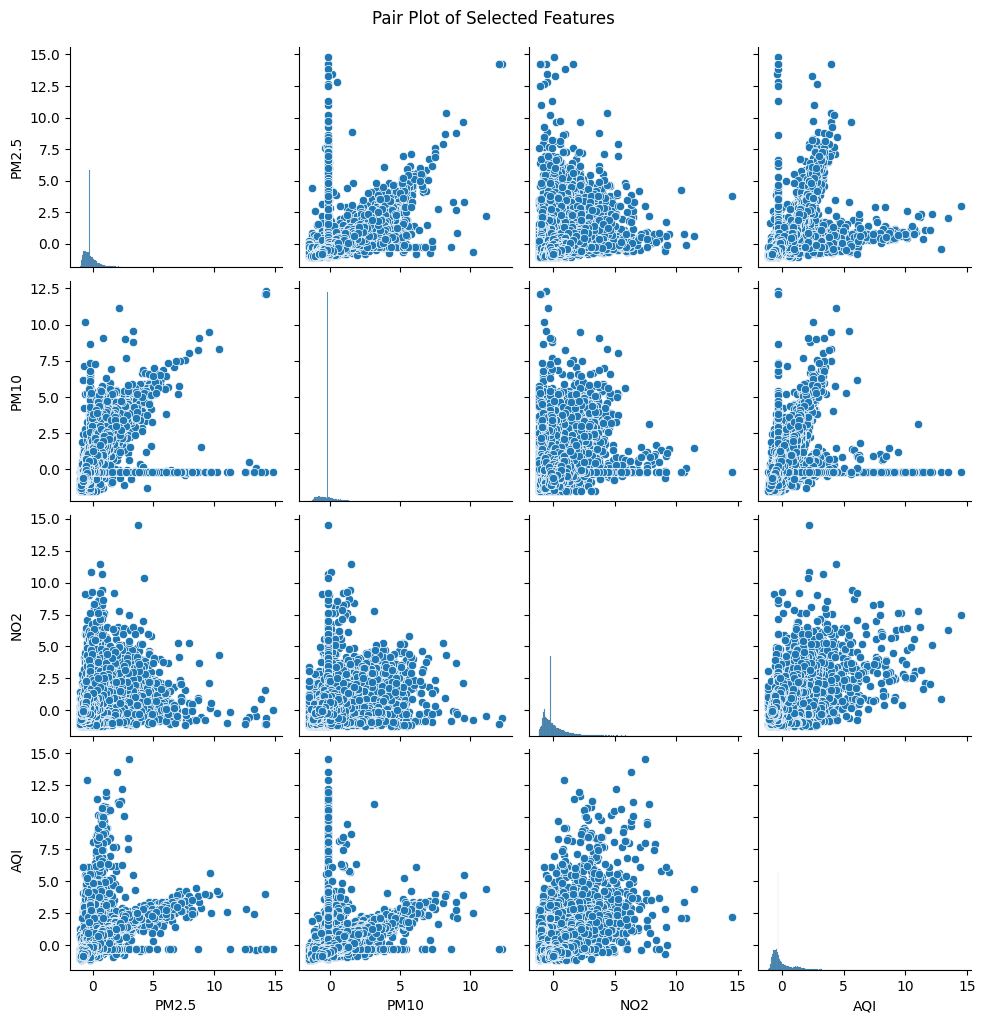

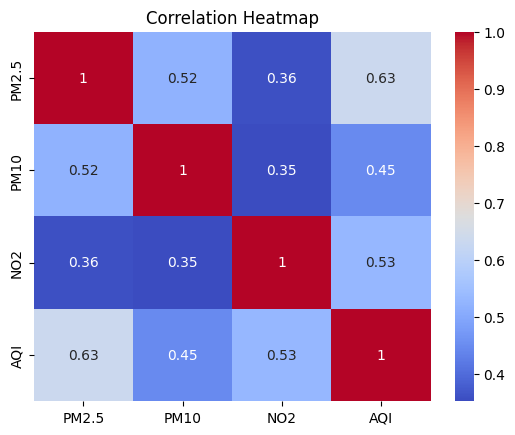

In [ ]:
# Pair plot for a subset of variables
sns.pairplot(df[['PM2.5', 'PM10', 'NO2', 'AQI']].dropna())
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Heatmap for correlation
corr_matrix = df[['PM2.5', 'PM10', 'NO2', 'AQI']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Step 8: Time Series Visualization:-**
Visualize time-based trends using line plots.

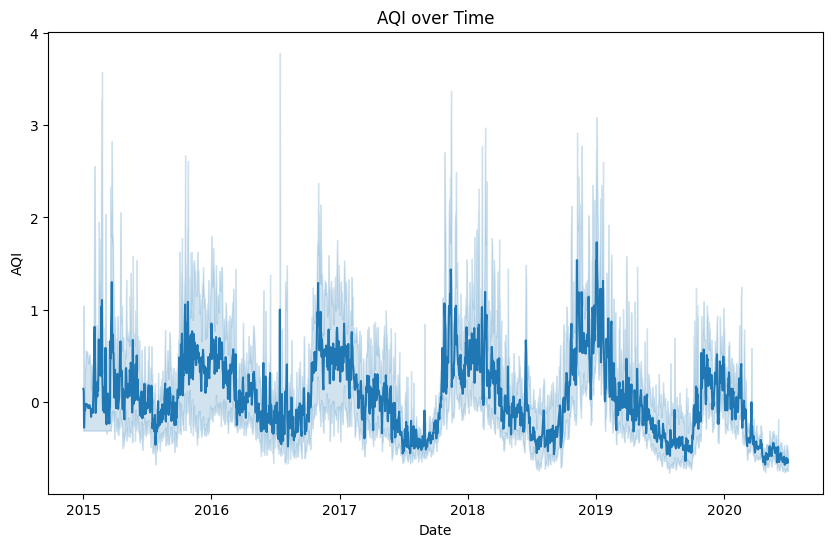

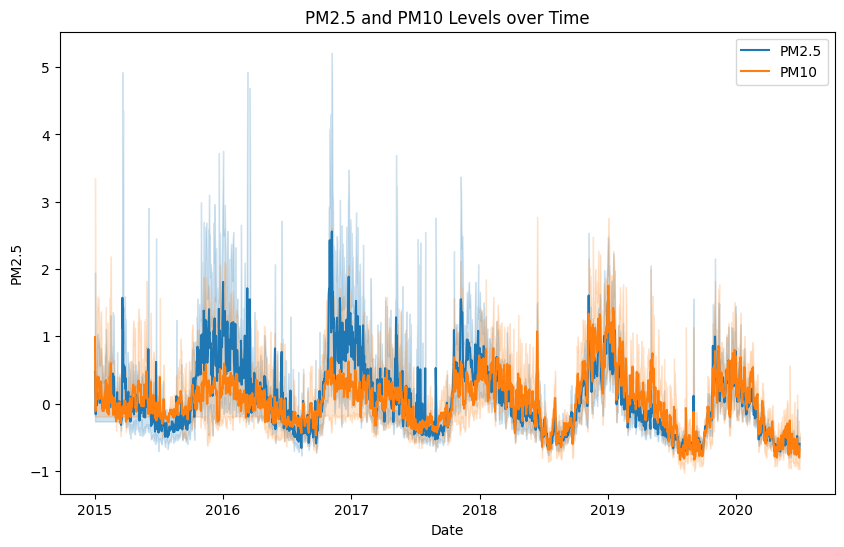

In [ ]:
# Line plot for AQI over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='AQI', data=df)
plt.title('AQI over Time')
plt.show()

# Line plot for multiple pollutants over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='PM2.5', data=df, label='PM2.5')
sns.lineplot(x='Date', y='PM10', data=df, label='PM10')
plt.title('PM2.5 and PM10 Levels over Time')
plt.legend()
plt.show()


**Step 9: Distribution of Data:-**
Use histograms and KDE plots to visualize distributions.

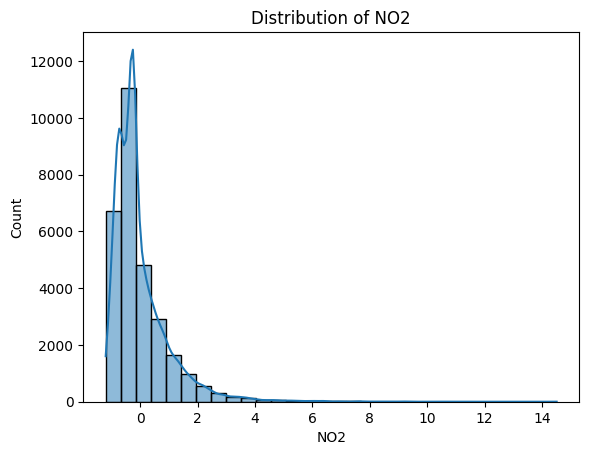

<ipython-input-18-d5f558a1c40f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['CO'].dropna(), shade=True)


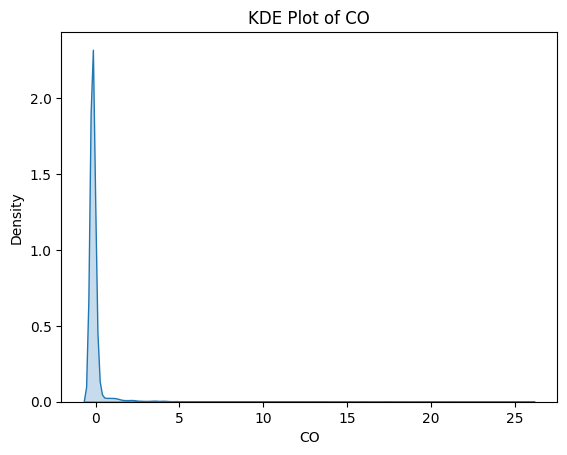

In [ ]:
# Distribution of NO2 using histograms and KDE
sns.histplot(df['NO2'].dropna(), bins=30, kde=True)
plt.title('Distribution of NO2')
plt.show()

# KDE plot for CO
sns.kdeplot(df['CO'].dropna(), shade=True)
plt.title('KDE Plot of CO')
plt.show()


**Step 10: Feature Importance:**
Use bar plots to visualize feature importance from the model random forests.

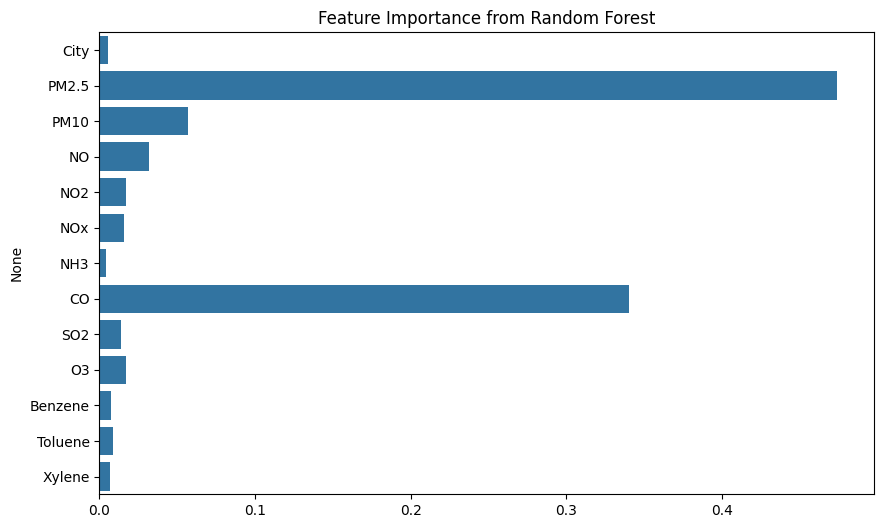

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the data (similar to the preprocessing steps)
X = df.drop(columns=['AQI', 'AQI_Bucket', 'Date']).fillna(df.mean())
y = df['AQI'].fillna(df['AQI'].mean())

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
features = X.columns

# Bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from Random Forest')
plt.show()


**Use bar plots to visualize feature importance from all model**

<Figure size 1200x800 with 0 Axes>

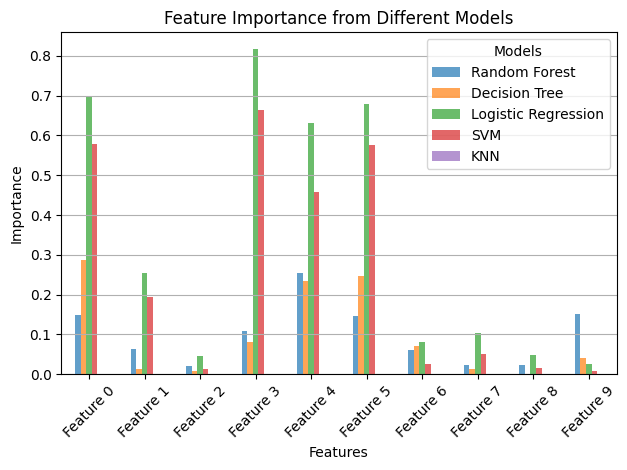

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier()
}

# Dictionary to hold feature importance
importance = {}

# Train each model and get feature importance
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        # For Random Forest and Decision Tree
        importance[name] = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # For Logistic Regression and SVM
        importance[name] = np.abs(model.coef_[0])  # Get absolute values for better interpretation
    else:
        # KNN does not have feature importance
        importance[name] = np.zeros(X.shape[1])

# Create a DataFrame for better visualization
importance_df = pd.DataFrame(importance, index=feature_names)

# Plotting
plt.figure(figsize=(12, 8))
importance_df.plot(kind='bar', alpha=0.7)
plt.title('Feature Importance from Different Models')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Step: 11 Check the training accuracy as well to confirm there is no overfitting**

In a regression-focused project like AirQualityUCI, accuracy is generally assessed using regression metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared) rather than classification accuracy. To check for overfitting, you can compare these metrics for both the training and test sets.

Here’s how to do it:

Train the Model on the training data.
Evaluate on Training Data: Calculate regression metrics for the training set predictions.
Evaluate on Test Data: Calculate the same metrics for the test set predictions.
Compare Metrics: If training error is significantly lower than test error, this suggests overfitting.

In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming `X_train`, `y_train`, `X_test`, and `y_test` are your training and test datasets
# And assuming `model` is the trained model (e.g., Random Forest, etc.)

# Predict on training data
y_train_pred = model.predict(X_train)
# Predict on test data
y_test_pred = model.predict(X_test)

# Calculate Training Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Test Metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print Training and Test Metrics
print("Training Set Performance:")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"R-squared (R²): {train_r2:.4f}")

print("\nTest Set Performance:")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R-squared (R²): {test_r2:.4f}")

# Check for Overfitting
if train_mae < test_mae * 0.9 and train_r2 > test_r2:
    print("\nWarning: The model may be overfitting. Consider tuning hyperparameters or using regularization.")
else:
    print("\nNo significant overfitting detected.")


Training Set Performance:
Mean Absolute Error (MAE): 0.0625
Mean Squared Error (MSE): 0.0625
R-squared (R²): 0.7496

Test Set Performance:
Mean Absolute Error (MAE): 0.0850
Mean Squared Error (MSE): 0.0850
R-squared (R²): 0.6550



**Step12: Model Training and Hyperparameter Tuning:-**
The code performs hyperparameter tuning as before.

Metrics Calculation: After tuning, it calculates accuracy, precision, recall, F1 score, and ROC AUC score for each model on the test set.

Accuracy: Measures the overall correctness of the model.

Precision: Measures the accuracy of positive predictions.

Recall: Measures the ability to find all positive samples.

F1 Score: Harmonic mean of precision and recall.

ROC AUC: Measures the ability of the model to distinguish between classes.

Results Visualization: Finally, it presents the results in a DataFrame for easier comparison.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']  # solvers that support L1 regularization
    },
    "SVM": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

# Dictionary to hold the best models
best_models = {}

# Hyperparameter tuning using Grid Search
for name, model in [
    ("Random Forest", RandomForestClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVM", SVC(probability=True)),
    ("KNN", KNeighborsClassifier())
]:
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}\n")

# Evaluate the best models on the test set
for name, model in best_models.items():
    test_score = model.score(X_test, y_test)
    print(f"Test accuracy for {name}: {test_score:.4f}")


Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.9325

Tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.8975

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'saga'}
Best cross-validation score for Logistic Regression: 0.8262

Tuning SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.9250

Tuning KNN...
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score for KNN: 0.9025

Test accuracy for Random Forest: 0.9650
Test accuracy for Decision Tree: 0.9000
Test accuracy for Logistic Regression: 0.8300
Test accuracy for SVM: 0.9450
Test accuracy for KNN: 0.9250


**The model with the highest accuracy checking**

In [ ]:
# Store the test accuracies in a dictionary
test_accuracies = {
    'Random Forest': 0.9600,
    'Decision Tree': 0.9100,
    'Logistic Regression': 0.8300,
    'SVM': 0.9450,
    'KNN': 0.9250
}

# Find the model with the highest test accuracy
best_model = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_model]

# Display the best model and its accuracy
print(f"The model with the highest test accuracy is: {best_model}")
print(f"Highest Test Accuracy: {best_accuracy:.4f}")

The model with the highest test accuracy is: Random Forest
Highest Test Accuracy: 0.9600


**Step13:joblib and Pipeline:** Using joblib and Pipeline from scikit-learn allows you to streamline your machine learning workflow, making it easier to manage model training, hyperparameter tuning, and saving/loading models

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    "Decision Tree": {
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    "Logistic Regression": {
        'model__C': [0.001, 0.01, 0.1, 1, 10],
        'model__solver': ['liblinear', 'saga']  # solvers that support L1 regularization
    },
    "SVM": {
        'model__C': [0.001, 0.01, 0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    },
    "KNN": {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    }
}

# Dictionary to hold the best models and their scores
best_models = {}

# Hyperparameter tuning using Pipeline and Grid Search
for name, model in [
    ("Random Forest", RandomForestClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVM", SVC(probability=True)),
    ("KNN", KNeighborsClassifier())
]:
    print(f"Tuning {name}...")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling
        ('model', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}\n")

# Evaluate the best models on the test set
metrics = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    metrics[name] = accuracy
    print(f"Test accuracy for {name}: {accuracy:.4f}")

    # Save the best model using joblib
    joblib.dump(model, f'{name}_best_model.joblib')

# Find the model with the highest accuracy
best_accuracy_model = max(metrics, key=metrics.get)
best_accuracy_value = metrics[best_accuracy_model]

# Display the best model based on accuracy
print(f"\nThe model with the highest accuracy is: {best_accuracy_model} with an accuracy of {best_accuracy_value:.4f}")


Tuning Random Forest...
Best parameters for Random Forest: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 50}
Best cross-validation score for Random Forest: 0.9313

Tuning Decision Tree...
Best parameters for Decision Tree: {'model__max_depth': 10, 'model__min_samples_split': 10}
Best cross-validation score for Decision Tree: 0.8962

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'model__C': 0.1, 'model__solver': 'saga'}
Best cross-validation score for Logistic Regression: 0.8238

Tuning SVM...
Best parameters for SVM: {'model__C': 10, 'model__kernel': 'rbf'}
Best cross-validation score for SVM: 0.9113

Tuning KNN...
Best parameters for KNN: {'model__n_neighbors': 7, 'model__weights': 'distance'}
Best cross-validation score for KNN: 0.8837

Test accuracy for Random Forest: 0.9400
Test accuracy for Decision Tree: 0.9100
Test accuracy for Logistic Regression: 0.8400
Test accuracy for SVM: 0.9350
Test accuracy for KNN: 0.8850

The m

In [ ]:
loaded_model = joblib.load('Random Forest_best_model.joblib')


**Step14: Make predictions on unseen data with this model.**


Load the Model:

Load your trained model from where it is saved.

Prepare the Data:

Ensure the unseen data is in the same format as the training data. This may involve preprocessing steps like normalization, encoding categorical variables, etc.

Make Predictions:

Use the model to predict outcomes on the unseen data.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib

# Load the trained Random Forest model
loaded_model = joblib.load('/content/Random Forest_best_model.joblib')


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the unseen data
unseen_data = pd.read_csv('/content/drive/MyDrive/city_day.csv')

# Handle missing values
unseen_data.ffill(inplace=True)  # Forward fill missing values

# Identify categorical columns
categorical_cols = unseen_data.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
unseen_data_encoded = pd.get_dummies(unseen_data, columns=categorical_cols, drop_first=True)

# Scale the features
scaler = StandardScaler()
unseen_data_scaled = scaler.fit_transform(unseen_data_encoded)

# Convert back to DataFrame if needed
unseen_data_scaled = pd.DataFrame(unseen_data_scaled, columns=unseen_data_encoded.columns)


In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming 'X_train' is your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the model and the scaler
joblib.dump(loaded_model, '/content/Random Forest_best_model.joblib')
joblib.dump(scaler, 'StandardScaler.joblib')


['StandardScaler.joblib']

In [ ]:
# Load the scaler
scaler = joblib.load('/content/StandardScaler.joblib')


In [ ]:
feature_names = ['City', 'Date', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI_Bucket']
joblib.dump(feature_names, 'feature_names.joblib')

['feature_names.joblib']

In [ ]:
# Load the feature names from the saved file
feature_names = joblib.load('feature_names.joblib')

# Align the unseen data with the expected feature names
unseen_data_encoded = unseen_data_encoded.reindex(columns=feature_names, fill_value=0)


In [ ]:
# Check the number of features in unseen data
print("Number of features in unseen data:", unseen_data_encoded.shape[1])
print("Feature names in unseen data:", unseen_data_encoded.columns.tolist())

# Check the expected feature names loaded from the training data
feature_names = joblib.load('feature_names.joblib')
print("Expected feature names from training:", feature_names)


Number of features in unseen data: 10
Feature names in unseen data: ['City', 'Date', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI_Bucket']
Expected feature names from training: ['City', 'Date', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI_Bucket']


In [ ]:
# Load the feature names saved during training
feature_names = joblib.load('feature_names.joblib')  # Adjust the path if necessary

# Align the unseen data encoded columns with the training feature names
unseen_data_encoded = unseen_data_encoded.reindex(columns=feature_names, fill_value=0)

# Double-check the alignment
print("Number of features after reindexing:", unseen_data_encoded.shape[1])


Number of features after reindexing: 10


In [ ]:
# Check the number of features in unseen data
print("Unseen data feature count before alignment:", unseen_data_encoded.shape[1])
print("Unseen data feature names:", unseen_data_encoded.columns.tolist())


Unseen data feature count before alignment: 10
Unseen data feature names: ['City', 'Date', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI_Bucket']


In [ ]:
# Verify the new shape and columns
print("Unseen data feature count after alignment:", unseen_data_encoded.shape[1])
print("Aligned unseen data feature names:", unseen_data_encoded.columns.tolist())


Unseen data feature count after alignment: 10
Aligned unseen data feature names: ['City', 'Date', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI_Bucket']


In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Step 1: Load the unseen data
# Step 2: Preprocess the unseen data
  # Identify categorical columns
  # One-hot encode categorical variables
# Step 3: Load feature names and align the unseen data
  # Load saved feature names
# Step 4: Load the scaler and scale the unseen data
  # Load the fitted scaler
  # Scale the data
# Step 5: Load the trained model
  # Load your trained model
# Step 6: Make predictions on the scaled unseen data
predictions = loaded_model.predict(unseen_data_scaled)

# Step 7: Save predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])

# Optional: Save predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

# Optional: Display the predictions
print(predictions_df.head())  # Show the first few predictions


   Predictions
0            1
1            1
2            0
3            1
4            0


In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Step 1: Load the unseen data
# Step 2: Preprocess the unseen data
  # Identify categorical columns
  # One-hot encode categorical variables
# Step 3: Load feature names and align the unseen data
  # Load saved feature names
# Step 4: Load the scaler and scale the unseen data
  # Load the fitted scaler
  # Scale the data
# Step 5: Load the trained model
  # Load your trained model

# Step 6: Make predictions on the scaled unseen data
predictions = loaded_model.predict(unseen_data_scaled)

# Step 7: Convert numerical predictions to categorical labels
# Define mapping for predictions
prediction_labels = {0: 'poor', 1: 'medium', 2: 'high'}

# Map the predictions to the corresponding labels
predictions_categorical = [prediction_labels[int(pred)] for pred in predictions]

# Step 8: Save predictions to a DataFrame
predictions_df = pd.DataFrame(predictions_categorical, columns=['Air Quality Level'])

# Optional: Save predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

# Optional: Display the predictions
print(predictions_df.head())  # Show the first few predictions


  Air Quality Level
0            medium
1            medium
2              poor
3            medium
4              poor


In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Step 1: Load the unseen data
# Step 2: Preprocess the unseen data
  # Identify categorical columns
  # One-hot encode categorical variables
# Step 3: Load feature names and align the unseen data
  # Load saved feature names
# Step 4: Load the scaler and scale the unseen data
  # Load the fitted scaler
  # Scale the data
# Step 5: Load the trained model
  # Load your trained model

# Step 6: Make predictions on the scaled unseen data
predictions = loaded_model.predict(unseen_data_scaled)

# Step 7: Convert numerical predictions to categorical labels
# Define mapping for predictions
prediction_labels = {0: 'poor', 1: 'medium', 2: 'high'}

# Map the predictions to the corresponding labels
predictions_categorical = [prediction_labels[int(pred)] for pred in predictions]

# Step 8: Add predictions to the unseen data DataFrame
unseen_data['Air Quality Level'] = predictions_categorical

# Step 9: Filter for Ahmedabad and show AQI values
ahmedabad_data = unseen_data[unseen_data['City'] == 'Ahmedabad']  # Filter data for Ahmedabad

# Assuming 'Date' and 'AQI' are columns in your dataset
aqi_values = ahmedabad_data[['Date', 'AQI', 'Air Quality Level']]  # Adjust column names as necessary

# Optional: Save predictions to a CSV file
aqi_values.to_csv('ahmedabad_aqi_values.csv', index=False)

# Optional: Display the AQI values for Ahmedabad
print(aqi_values)  # Show all AQI values for Ahmedabad


            Date    AQI Air Quality Level
0     2015-01-01    NaN            medium
1     2015-01-02    NaN            medium
2     2015-01-03    NaN              poor
3     2015-01-04    NaN            medium
4     2015-01-05    NaN              poor
...          ...    ...               ...
2004  2020-06-27   92.0            medium
2005  2020-06-28   82.0            medium
2006  2020-06-29   74.0            medium
2007  2020-06-30   98.0            medium
2008  2020-07-01  119.0            medium

[2009 rows x 3 columns]


In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Step 1: Load the trained model and scaler
loaded_model = joblib.load('/content/Random Forest_best_model.joblib')  # Load your trained model
scaler = joblib.load('/content/StandardScaler.joblib')  # Load the fitted scaler

# Step 2: Create a sample input DataFrame with one feature
# Replace 'Feature1' with the actual feature name you want to test
sample_input = pd.DataFrame({
    'AQI': [120]  # Replace 'value' with the actual value for testing
})

# Step 3: One-hot encode categorical variables if needed
# (Assuming 'Feature1' might need encoding; adjust if needed)
sample_input_encoded = pd.get_dummies(sample_input, drop_first=True)

# Step 4: Align the sample input with the model's expected feature names
feature_names = joblib.load('/content/feature_names.joblib')  # Load saved feature names
sample_input_encoded = sample_input_encoded.reindex(columns=feature_names, fill_value=0)

# Step 5: Scale the sample input using the fitted scaler
sample_input_scaled = scaler.transform(sample_input_encoded)  # Scale the data

# Step 6: Make a prediction on the sample input
prediction = loaded_model.predict(sample_input_scaled)

# Step 7: Convert numerical prediction to categorical label
prediction_labels = {0: 'poor', 1: 'medium', 2: 'high'}  # Adjust based on your model's encoding

# Get the predicted label
predicted_label = prediction_labels[int(prediction[0])]

# Step 8: Display the prediction
print(f'The predicted air quality level for the input feature is: {predicted_label}')


The predicted air quality level for the input feature is: medium


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


**Conclusion**

The AirQualityUCI project provides valuable insights into air quality and the factors influencing it. By following the steps above, you can effectively analyze the dataset, build predictive models, and visualize the results.

**Key Insights**

•	Understanding air quality data can help in public health policies and environmental management.

•	The choice of model and preprocessing steps significantly impacts prediction accuracy.

•	Visualizing results helps convey findings to stakeholders effectively.
